In [2]:
import numpy as np
from datascience import *
np.set_printoptions(threshold=50, linewidth=50)

## Bikes (Review)

In [3]:
# Download data (it may take minutes)
import os
if not os.path.exists('201508_station_data.csv'):
    !wget https://s3.amazonaws.com/babs-open-data/babs_open_data_year_2.zip && \
        unzip babs_open_data_year_2.zip && \
        rm 201508_status_data.csv babs_open_data_year_2.zip

In [4]:
# Lecture 8
trips = Table.read_table('201508_trip_data.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [7]:
weather = Table.read_table('201508_weather_data.csv')
temp = weather.where('Zip', 94107).select([0, 1]).sort(1).relabeled(0, 'Date').relabeled(1, 'Temp')
temp

Date,Temp
1/2/2015,50
1/3/2015,53
1/4/2015,54
12/27/2014,55
12/28/2014,55
12/29/2014,55
12/30/2014,55
12/12/2014,56
12/15/2014,56
1/1/2015,56


In [8]:
def day(time):
    return np.array(time.split()).item(0)

day('8/31/2015 23:26')

'8/31/2015'

In [9]:
dates = trips.apply(day, 2)
dates

array(['8/31/2015', '8/31/2015', '8/31/2015', ...,
       '9/1/2014', '9/1/2014', '9/1/2014'], 
      dtype='<U10')

In [10]:
trip_dates = trips.select('Start Station').with_column('Date', dates)
trip_dates

Start Station,Date
Harry Bridges Plaza (Ferry Building),8/31/2015
San Antonio Shopping Center,8/31/2015
Post at Kearny,8/31/2015
San Jose City Hall,8/31/2015
Embarcadero at Folsom,8/31/2015
Yerba Buena Center of the Arts (3rd @ Howard),8/31/2015
Embarcadero at Folsom,8/31/2015
Embarcadero at Sansome,8/31/2015
Beale at Market,8/31/2015
Post at Kearny,8/31/2015


In [57]:
by_date = trip_dates.group('Date').sort(1).relabeled(1, 'Trips')
by_date

Date,Trips
12/11/2014,107
11/30/2014,121
11/27/2014,133
2/8/2015,141
12/25/2014,150
1/1/2015,181
1/4/2015,206
4/5/2015,216
12/27/2014,231
11/23/2014,235


## Join

In [77]:
both = by_date.join('Date', temp)
both

Date,Trips,Temp
1/1/2015,181,56
1/10/2015,362,60
1/11/2015,327,57
1/12/2015,1344,57
1/13/2015,1368,66
1/14/2015,1296,59
1/15/2015,1229,59
1/16/2015,1082,57
1/17/2015,319,57
1/18/2015,275,65


#### Discussion Question

In [34]:
np.average(both.where(both.column('Temp') < 65).column('Trips'))

847.41525423728808

In [62]:
np.average(both.where(both.column('Temp') >= 65).column('Trips'))

1028.9757085020242

## Pivot

In [36]:
set(weather.column(' Events'))

{nan, 'Fog', 'Fog-Rain', 'Rain-Thunderstorm', 'Rain'}

In [30]:
def moisture(event):
    if event == 'Rain' or event == 'Fog-Rain' or event == 'Rain-Thunderstorm':
        return 'Wet'
    elif event == 'Fog':
        return 'Moist'
    else:
        return 'Dry'
    
def temperature(k):
    if k >= 65:
        return "Hot"
    else:
        return "Cold"
    
climate = Table().with_columns([
        'Date',  weather.column(0),
        'Water', weather.apply(moisture, ' Events'),
        'Temp',  weather.apply(temperature, 'Max TemperatureF'),
    ])

climate

Date,Water,Temp
9/1/2014,Dry,Hot
9/2/2014,Dry,Hot
9/3/2014,Dry,Hot
9/4/2014,Dry,Hot
9/5/2014,Dry,Hot
9/6/2014,Dry,Hot
9/7/2014,Dry,Hot
9/8/2014,Dry,Hot
9/9/2014,Dry,Hot
9/10/2014,Dry,Hot


In [67]:
days = by_date.join('Date', climate)
days

Date,Trips,Water,Temp
1/1/2015,181,Dry,Cold
1/10/2015,362,Moist,Cold
1/11/2015,327,Moist,Cold
1/12/2015,1344,Moist,Cold
1/13/2015,1368,Moist,Hot
1/14/2015,1296,Dry,Cold
1/15/2015,1229,Moist,Cold
1/16/2015,1082,Wet,Cold
1/17/2015,319,Dry,Cold
1/18/2015,275,Moist,Hot


In [68]:
days.select([3, 1]).group(0, np.average)

Temp,Trips average
Cold,847.415
Hot,1028.98


In [37]:
days.groups(['Water', 'Temp'])

Water,Temp,count
Dry,Cold,71
Dry,Hot,202
Moist,Cold,16
Moist,Hot,18
Wet,Cold,31
Wet,Hot,27


In [38]:
days.pivot('Water', 'Temp')

Temp,Dry,Moist,Wet
Cold,71,16,31
Hot,202,18,27


In [39]:
days.pivot('Water', 'Temp', 'Trips', np.average)

Temp,Dry,Moist,Wet
Cold,900.324,1037.56,628.097
Hot,1033.05,901.167,1083.67


## Charts

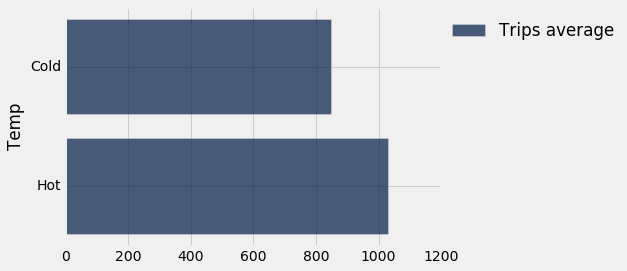

In [75]:
days.select([3, 1]).group(0, np.average).barh('Temp')

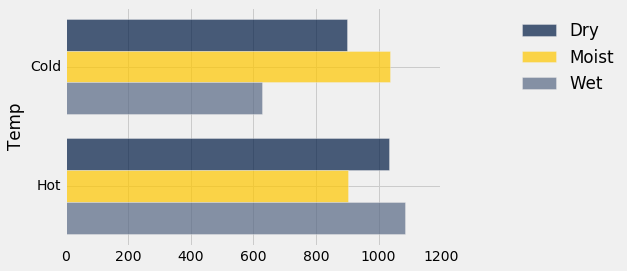

In [59]:
days.pivot('Water', 'Temp', 'Trips', np.average).barh('Temp')

In [44]:
# Download data
import os
if not os.path.exists('kaiser_ethnicity_everyone.csv'):
    !wget https://raw.githubusercontent.com/data-8/textbook/gh-pages/notebooks/kaiser_ethnicity_everyone.csv
    !wget https://raw.githubusercontent.com/data-8/textbook/gh-pages/notebooks/kaiser_ethnicity_children.csv

In [45]:
# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
everyone = Table.read_table('kaiser_ethnicity_everyone.csv')
children = Table.read_table('kaiser_ethnicity_children.csv')
children.set_format(2, NumberFormatter)
everyone.set_format(2, NumberFormatter)

State,Race/Ethnicity,Population
Alabama,White,"3,167,600"
Alabama,Black,"1,269,200"
Alabama,Hispanic,"191,000"
Alabama,Asian,"77,300"
Alabama,American Indian/Alaska Native,0
Alabama,Two Or More Races,"56,100"
Alabama,Total,"4,768,000"
Alaska,White,"396,400"
Alaska,Black,"17,000"
Alaska,Hispanic,"59,200"


In [47]:
everyone.where('State', 'California')

State,Race/Ethnicity,Population
California,White,"15,172,800"
California,Black,"2,068,500"
California,Hispanic,"14,786,000"
California,Asian,"5,662,400"
California,American Indian/Alaska Native,"198,600"
California,Two Or More Races,"813,100"
California,Total,"38,701,300"


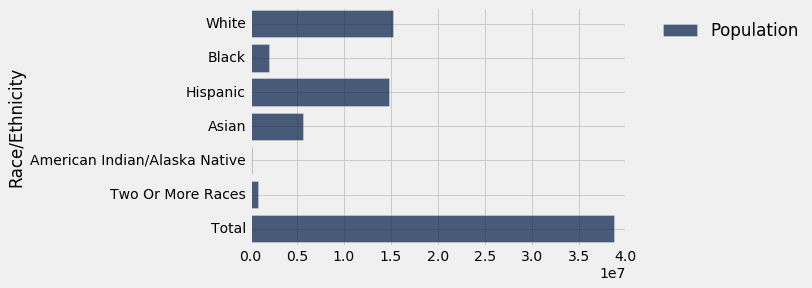

In [48]:
everyone.where('State', 'California').barh('Race/Ethnicity', 'Population')

In [49]:
children.where('State', 'California')

State,Race/Ethnicity,Population
California,White,"2,786,000"
California,Black,"484,200"
California,Hispanic,"4,849,400"
California,Other,"1,590,100"
California,Total,"9,709,700"


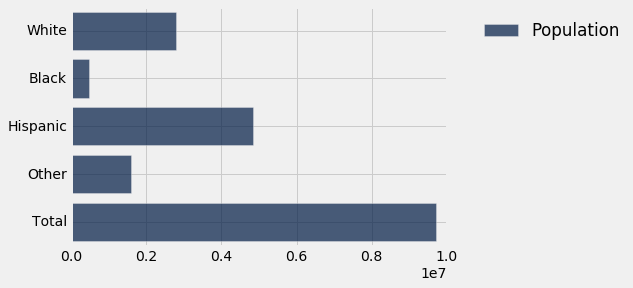

In [50]:
children.where('State', 'California').barh(1, 2)

In [51]:
totals = everyone.join('State', everyone.where(1, 'Total').relabeled('Population', 'State Total')).drop(3)
totals

State,Race/Ethnicity,Population,State Total
Alabama,White,3167600,4768000
Alabama,Black,1269200,4768000
Alabama,Hispanic,191000,4768000
Alabama,Asian,77300,4768000
Alabama,American Indian/Alaska Native,0,4768000
Alabama,Two Or More Races,56100,4768000
Alabama,Total,4768000,4768000
Alaska,White,396400,695700
Alaska,Black,17000,695700
Alaska,Hispanic,59200,695700


In [52]:
proportions = everyone.select([0, 1]).with_column('Proportion', totals.column(2)/totals.column(3))
proportions.set_format(2, PercentFormatter)

State,Race/Ethnicity,Proportion
Alabama,White,66.43%
Alabama,Black,26.62%
Alabama,Hispanic,4.01%
Alabama,Asian,1.62%
Alabama,American Indian/Alaska Native,0.00%
Alabama,Two Or More Races,1.18%
Alabama,Total,100.00%
Alaska,White,56.98%
Alaska,Black,2.44%
Alaska,Hispanic,8.51%


In [53]:
children_proportions = children.select([0, 1]).with_column(
    'Children Proportion', children.column(2) / children.join('State', children.where(1, 'Total')).column(4))
children_proportions.set_format(2, PercentFormatter)

State,Race/Ethnicity,Children Proportion
Alabama,White,59.99%
Alabama,Black,30.50%
Alabama,Hispanic,6.41%
Alabama,Other,3.09%
Alabama,Total,100.00%
Alaska,White,46.00%
Alaska,Black,2.60%
Alaska,Hispanic,11.99%
Alaska,Other,39.36%
Alaska,Total,100.00%


In [54]:
def compare(state):
    prop_for_state = proportions.where('State', state).drop(0)
    children_prop_for_state = children_proportions.where('State', state).drop(0)
    joined = prop_for_state.join('Race/Ethnicity', children_prop_for_state)
    joined.set_format([1, 2], PercentFormatter)
    return joined.sort('Proportion')

compare('California')

Race/Ethnicity,Proportion,Children Proportion
Black,5.34%,4.99%
Hispanic,38.21%,49.94%
White,39.20%,28.69%
Total,100.00%,100.00%


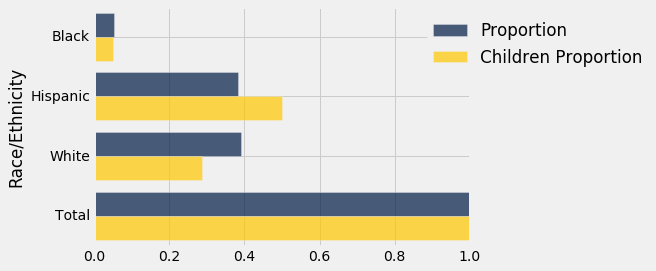

In [55]:
compare('California').barh('Race/Ethnicity')

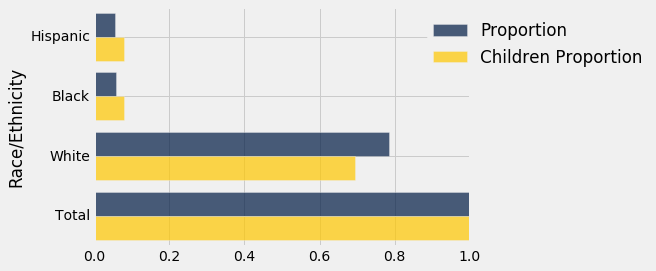

In [56]:
compare('Minnesota').barh('Race/Ethnicity')